In [3]:
import json
import matplotlib.pyplot as plt
import pandas as pd

In [24]:
corr_res = pd.read_csv("res_all_t05.csv")
corr_res = corr_res.drop(columns=["human"])

In [25]:
categories = ["animals", "body_parts", "clothes", "foods", "furnishings-fittings", "furniture", "hobbies", "housing_buildings", "kitchenware", "plants", "stationery", "vehicles"]

In [26]:
def get_corr_plot(x, height, style=None, save=False, title="", ext="png"):
    if style is None:
        style = {
            "edgecolor": "black",
            "linewidth": 0.5,
            }
    
    fig, ax = plt.subplots(1, 1, figsize=(15, 10), layout="tight")

    ax.bar(x, height=height, **style)
    ax.set_ylim(0, 0.7)

    fig.supylabel("pearson correlation")
    plt.xticks(rotation="vertical")

    if save:
        plt_fname = title.replace(" ", "_") + "." + ext if title != "" else "corr" + "." + ext
        plt.savefig(plt_fname, format=ext.replace(".", ""))

    fig.show()

In [27]:
def plot_corrs_cat(categories, filedir="category", style=None, title="", ext="png", save=False):
    if style is None:
        style = {
            "edgecolor": "black",
            "linewidth": 0.5,
            }
    
    fig, axs = plt.subplots(3, 4, figsize=(15, 15), layout="tight", sharex=True, sharey=True)
    axs = axs.ravel()

    for i, cat in enumerate(sorted(categories)):
        data = pd.read_csv(f"{filedir}/res_{cat}_t05.csv")
        data = data.drop(columns=["human"])

        axs[i].bar(x=data.iloc[0].index, height=data.iloc[0].values, **style)
        axs[i].set_title(cat)
        axs[i].tick_params(labelrotation=90)
        axs[i].set_ylim(-.5, 1)
    
    fig.show()

    if save:
        plt_fname = title.replace(" ", "_") + ".category." + ext if title != "" else "corr.category." + "." + ext
        plt.savefig(plt_fname, format=ext.replace(".", "")) 

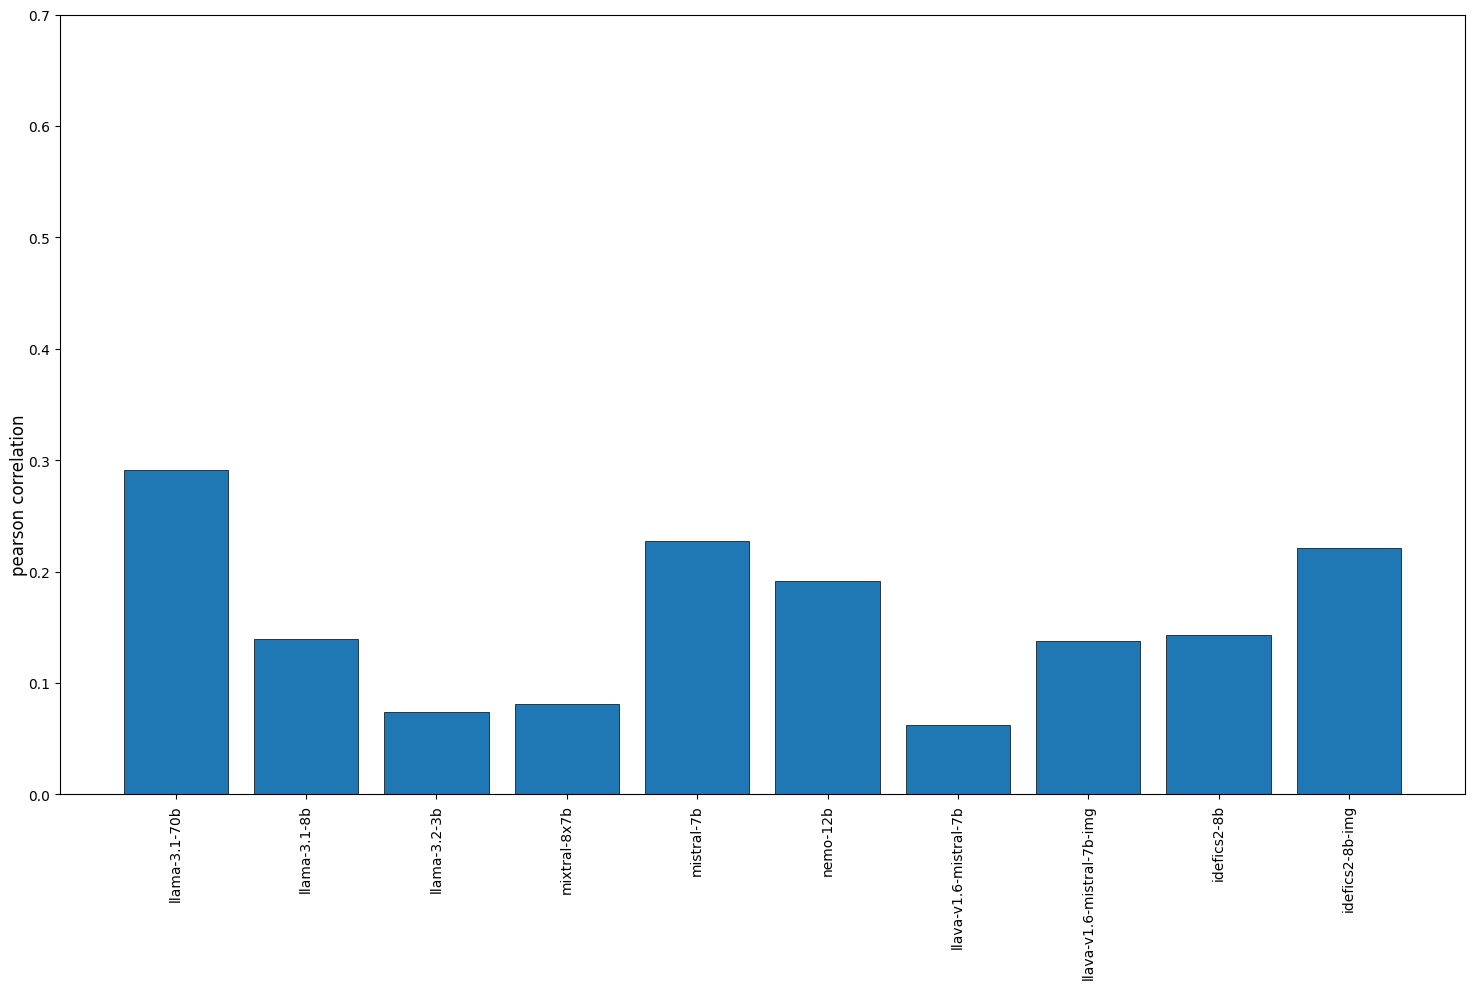

In [28]:
get_corr_plot(corr_res.iloc[0].index, corr_res.iloc[0].values, save=True, title="magnitude correlations")

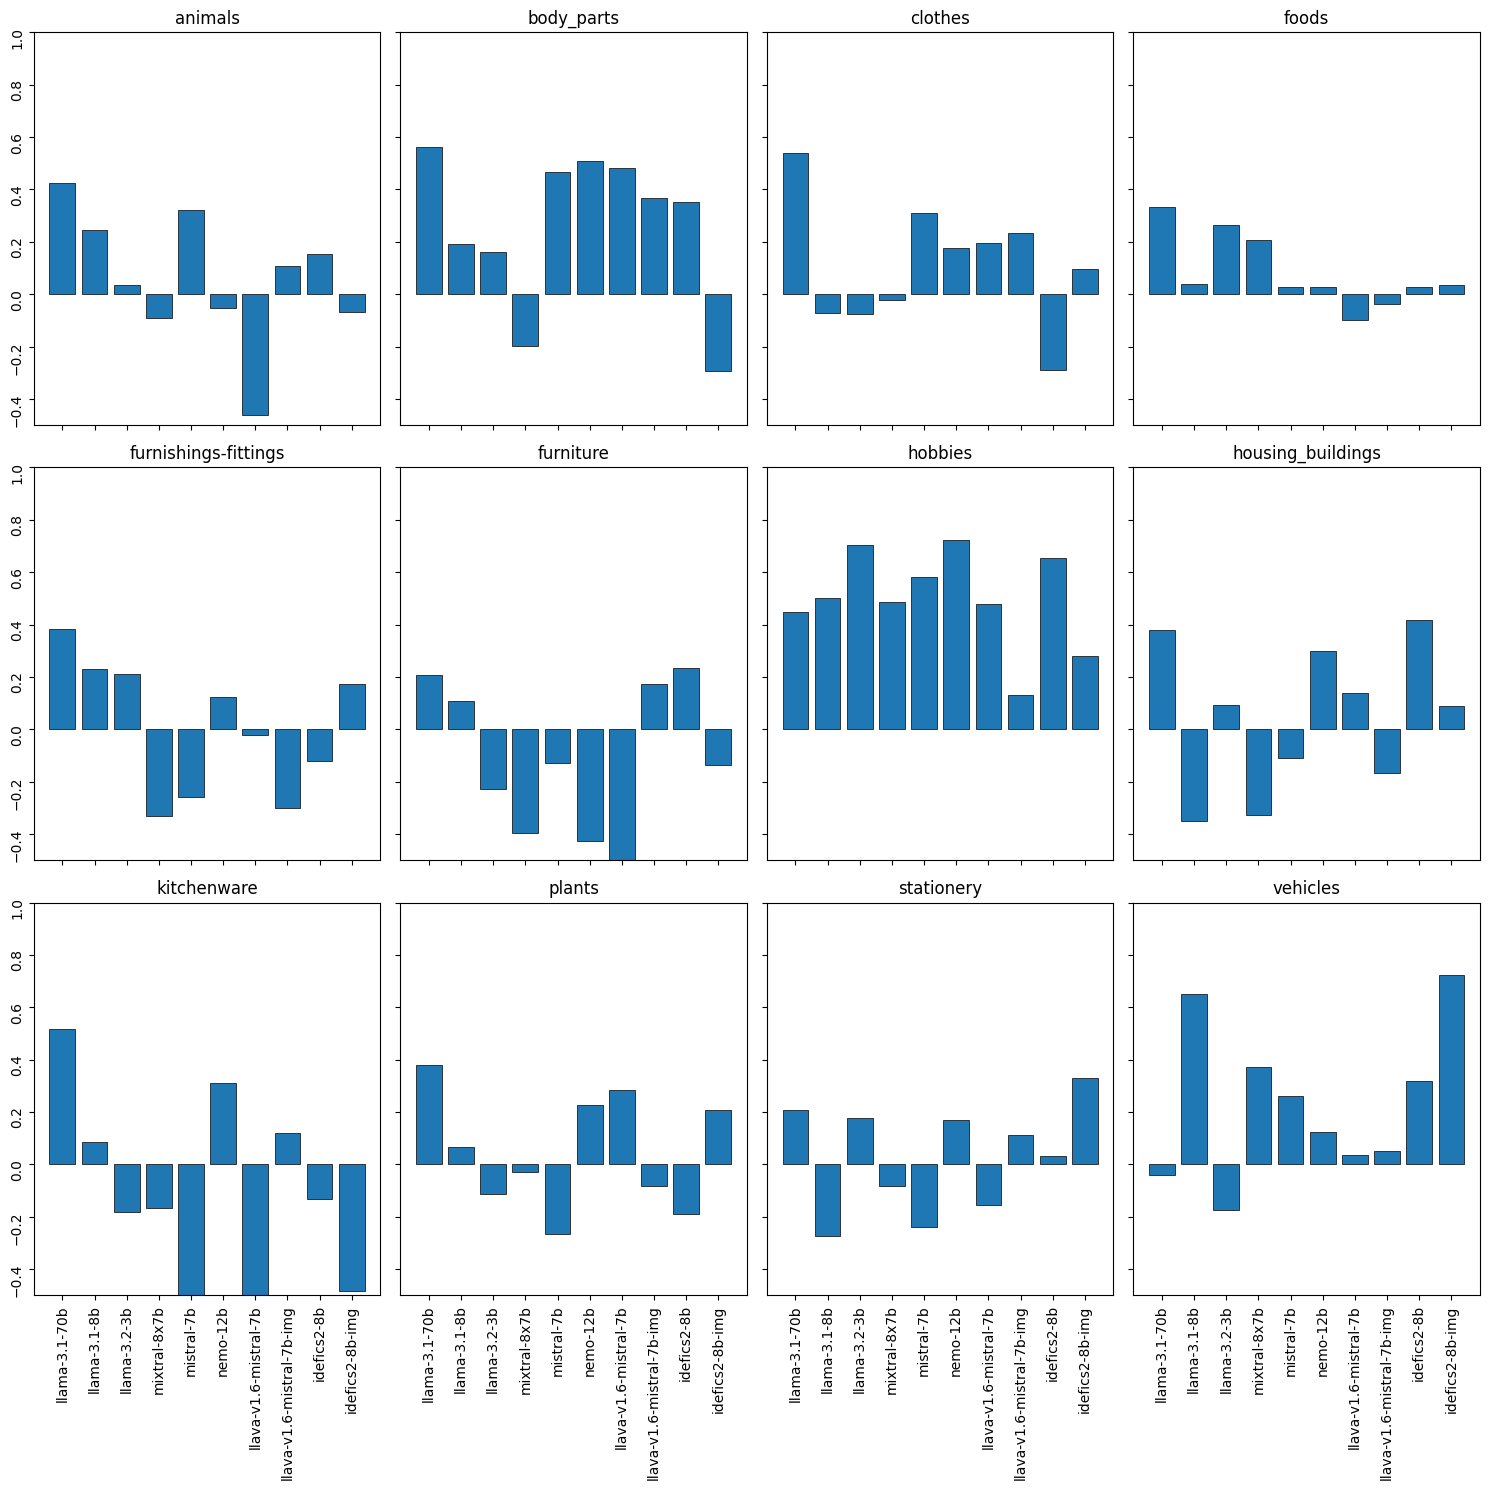

In [29]:
plot_corrs_cat(categories, save=True, title="magnitude correlations")